<a href="https://colab.research.google.com/github/datrz/its.damian/blob/main/HANDBALL_PaddleOCR_Tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install the PaccleOCR layout parser package
Install version 2.0.1 of PaddleOCR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/ColabNotebooks/Handball/
!pwd

/content/drive/MyDrive/ColabNotebooks/Handball
/content/drive/MyDrive/ColabNotebooks/Handball


In [ ]:
!pip install -U https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl (19.1 MB)


In [ ]:
!pip install paddlepaddle "paddleocr>=2.0.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pdf2image
!apt install convеrt_from_path
!pip install pytesseract
!brew install poppler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package convеrt_from_path
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: brew: command not found


In [ ]:
# import module
import pdf2image as p2
pages = p2.convert_from_path('p.pdf')

for i in range(len(pages)):
  pages[i].save('p.jpg', 'JPEG')

#for page in pages:
#    page.save('out.jpg', 'JPEG')

Import all needed packages and an example of the card:

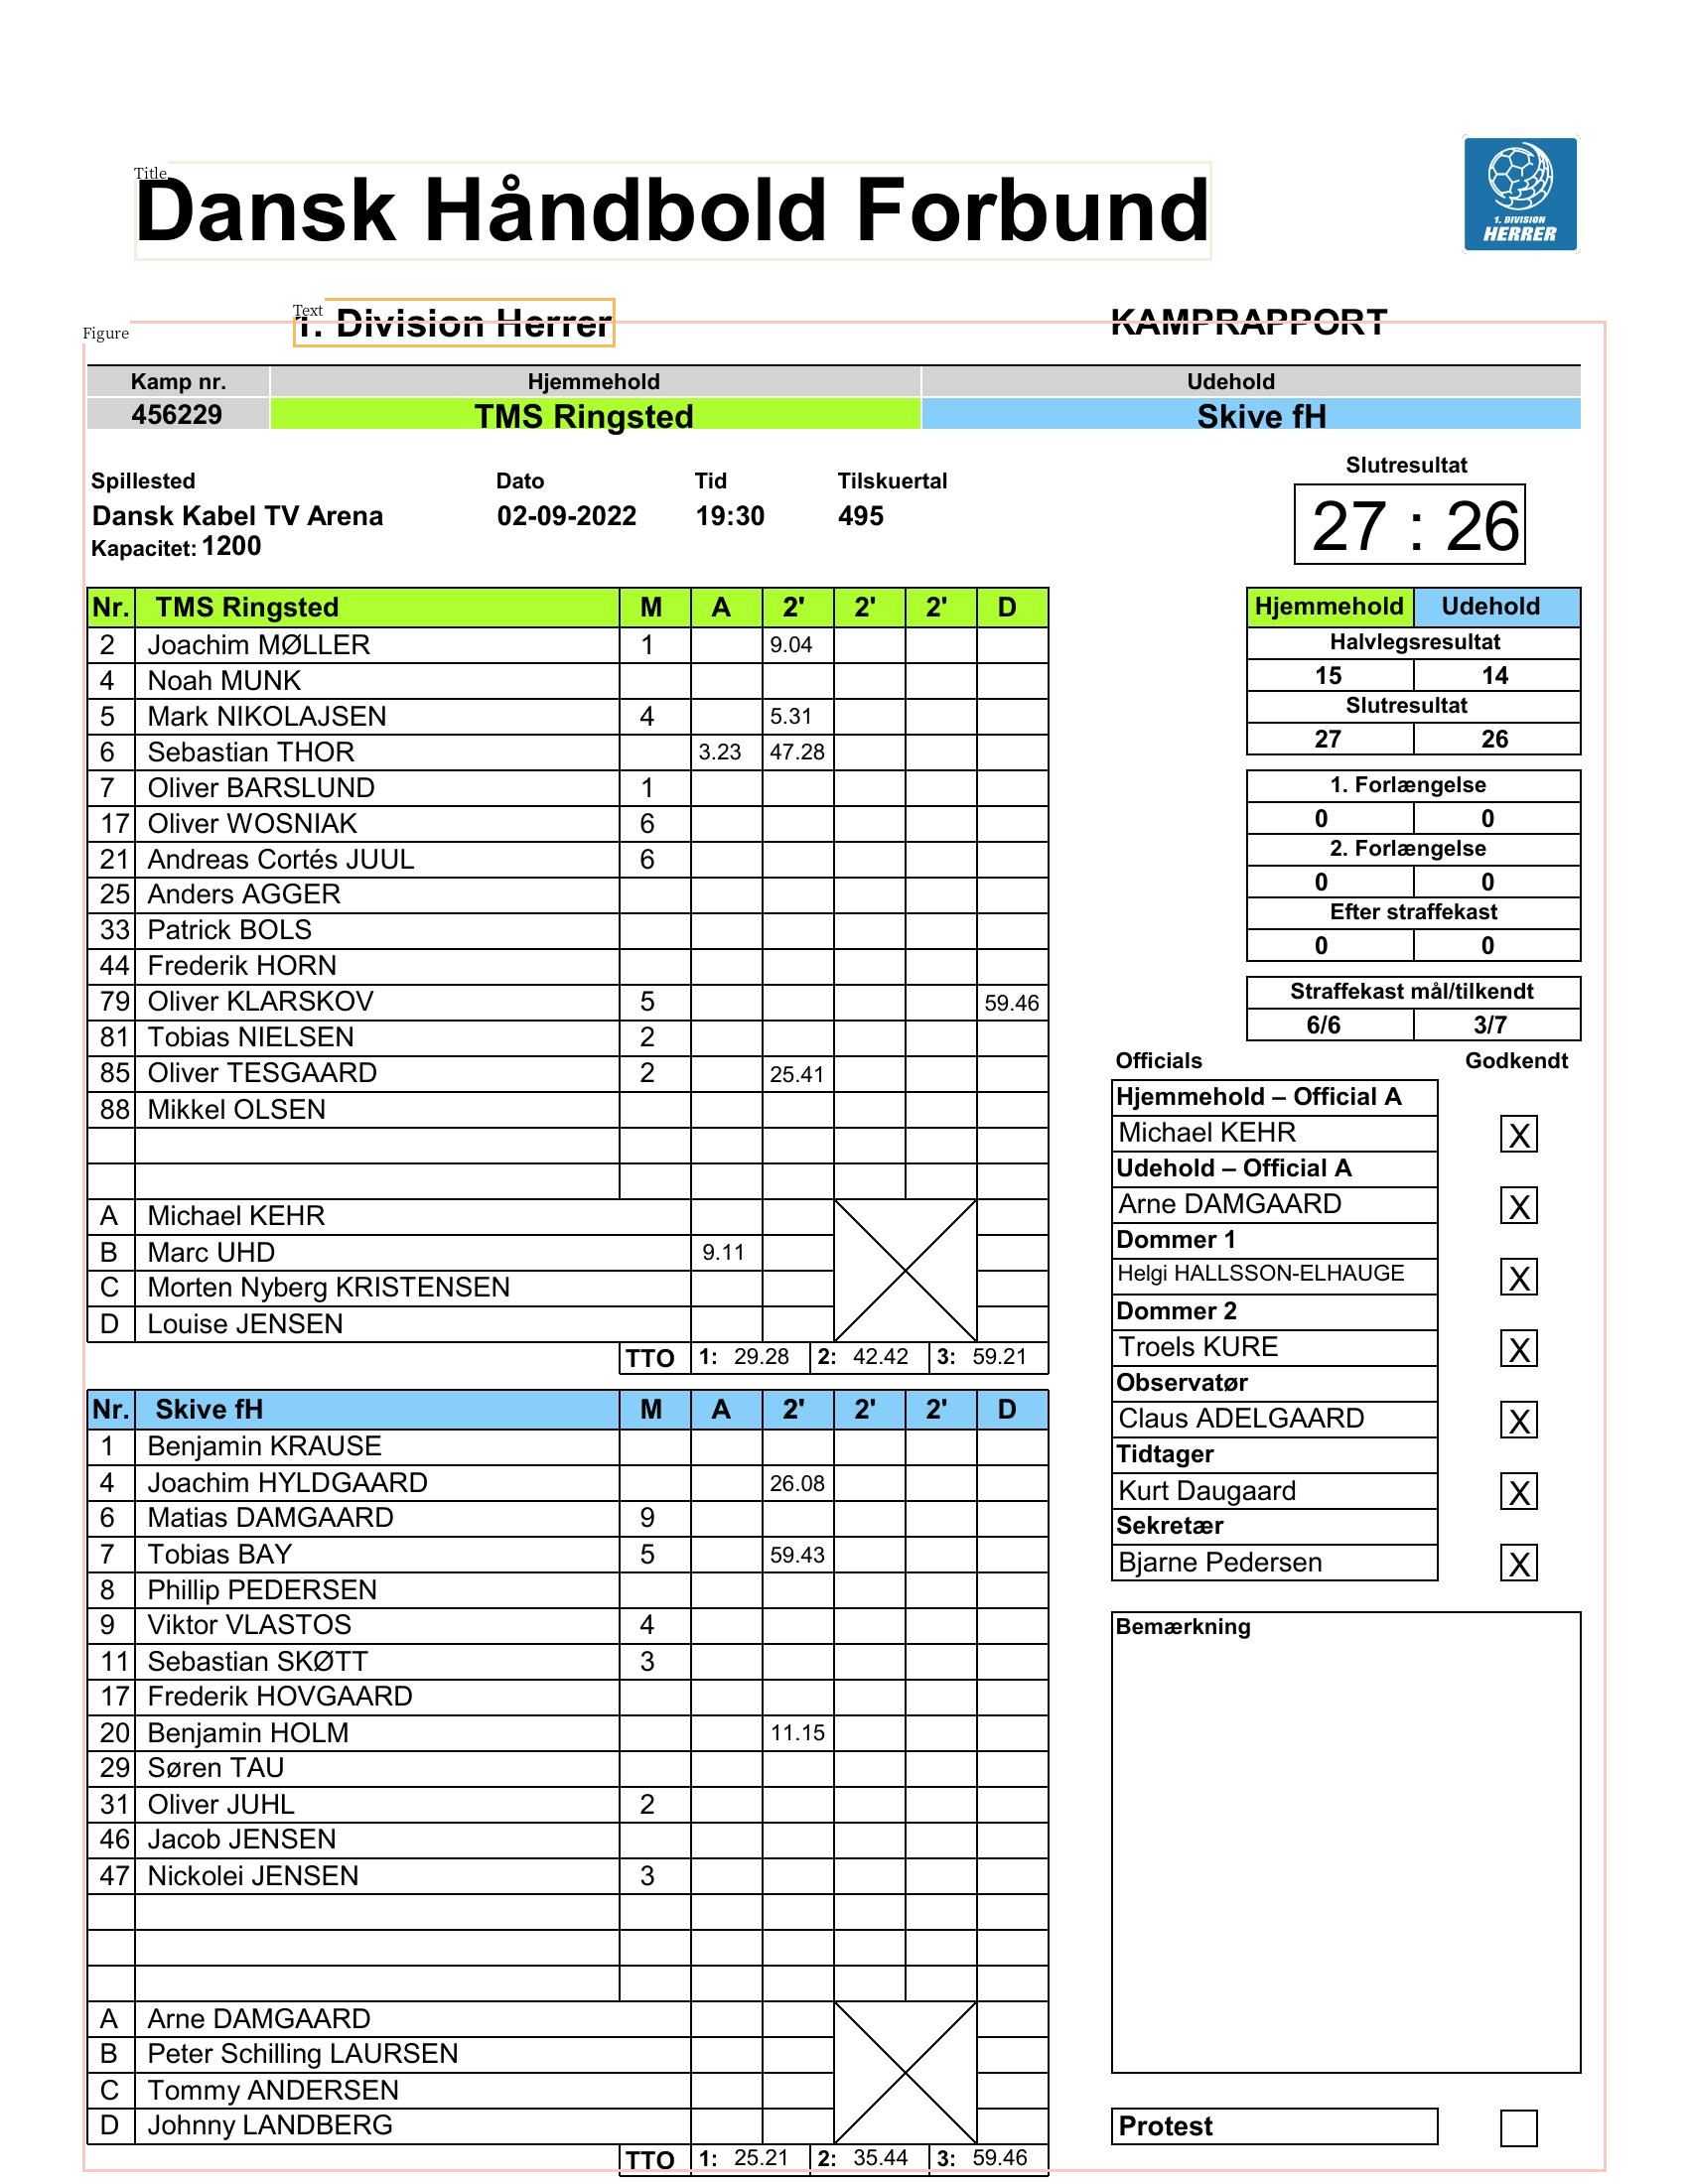

In [ ]:
import cv2
import layoutparser as lp
import numpy as np
import math
import matplotlib.pyplot as plt
image = cv2.imread("p.jpg")

#changing format of the image to fit PaddleOCR format requirement
image = image[..., ::-1]

# load model ready to use model from the package, suited for table recognition
## Adding thereshold (min probability for recognizing something as things from label_map)
## Adding labels to elements to be recognized in Label_map
## False for enforcing using CPU
## Enabling certain model to be used for this task

model = lp.PaddleDetectionLayoutModel(config_path="lp://PubLayNet/ppyolov2_r50vd_dcn_365e_publaynet/config",
                                threshold=0.5,
                                label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"},
                                enforce_cpu=False,
                                enable_mkldnn=True)
# Detect - like predict attribute
layout = model.detect(image)

# show result
show_img = lp.draw_box(image, layout, box_width=3, show_element_type=True)
show_img

In [ ]:
# DRAFT - finding tables/figures and saving their coordinates
for l in layout:
  if l.type in ['Table', 'Figure']:
    x_1 = int(l.block.x_1)
    y_1 = int(l.block.y_1)
    x_2 = int(l.block.x_2)
    y_2 = int(l.block.y_2)

In [ ]:
# Extracting only the area marked with the rectangle
image = cv2.imread('p.jpg')
cv2.imwrite('p_extracted.jpg', image[y_1:y_2, x_1:x_2])

True

In [ ]:
from paddleocr import PaddleOCR, draw_ocr

In [ ]:
# OCR in this case also cards as predit
ocr = PaddleOCR(lang='en')
image_height = image.shape[0]
image_width = image.shape[1]
output = ocr.ocr('p.jpg')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:08<00:00, 480kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:20<00:00, 483kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:16<00:00, 132kiB/s]

[2022/11/25 08:21:41] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set

[2022/11/25 08:21:42] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/11/25 08:21:43] ppocr DEBUG: dt_boxes num : 154, elapse : 1.0097801685333252
[2022/11/25 08:21:57] ppocr DEBUG: rec_res num  : 154, elapse : 13.952318668365479


In [ ]:
# Extracting output - coordinates for boxes with text and the content of them. Then probabilities that the text is that text
boxes = [line[0] for line in output[0]]
texts = [line[1][0] for line in output[0]]
probabilities = [line[1][1] for line in output[0]]

In [ ]:
# Creating an image with overlay of boxes and text on them
image_with_boxes = image.copy()
for box, text in zip(boxes, texts):
  cv2.rectangle(image_with_boxes,
                (int(box[0][0]), int(box[0][1])), (int(box[2][0]), int(box[2][1])),
                (0,0,255), 1
  )
  cv2.putText(image_with_boxes, text, (int(box[1][0]), int(box[0][1])),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (222,0,0), 1)
cv2.imwrite('p_with_boxes.jpg', image_with_boxes)

True

In [ ]:
# Extracting example of an index for box related to VVA and VPO-0
box_vaa = boxes[texts.index('VAA')]
box_vpo0 = boxes[texts.index('VPO-0')]

In [ ]:
box_vaa

[[1801.0, 1357.0], [1902.0, 1357.0], [1902.0, 1408.0], [1801.0, 1408.0]]

In [ ]:
box_vpo0

[[723.0, 1394.0], [859.0, 1394.0], [859.0, 1445.0], [723.0, 1445.0]]